In [1]:
#!pip install geopandas
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import scipy.stats
import math

df = gpd.read_file("children_data.geojson")
# Importing our geojson file which was exported from the qgis project. 
# This file has the 3rd layer overlay (the child layer)


In [2]:
# Displaying list of all columns in the child layer. 
# The data all comes from the parents except for 'proportion_of_census_parent_area' and 'geometry', which are unique to the child
# We can reference associated parents via the 'zoning_parentid' and 'census_parentid

for col in df.columns:
    print(col)    

fid
objectid
date
districts
ordinance
hyperlink
overlay_type
status
type
notes
squaremile
acreage
edit_date
edit_by
st_areashape
st_lengthshape
zoning_parentid
zoning_parent_sqmeters
fid_2
objectid_2
statefp10
countyfp10
tractce10
blockce10
geoid10
name10
mtfcc10
ur10
uace10
funcstat10
aland10
awater10
intptlat10
intptlon10
total_pop
hisp_latino
not_hisp_latino
pop_one_race
white_alone
black_africamer_alone
amerind_aknat_alone
asian_alone
nathaw_pacisl_alone
other_race_alone
pop_two_or_more_races
over18_total_pop
over18_hisp_latino
over18_not_hisp_latino
over18_pop_one_race
over18_white_alone
over18_black_africamer_alone
over18_amerind_aknat_alone
over18_asian_alone
over18_nathaw_pacisl_alone
over18_other_race_alone
over18_pop_two_or_more_races
total_housing_units
occupied_housing_units
vacant_housing_units
st_areashape_2
st_lengthshape_2
census_parentid
census_parent_sqmeters
proportion_of_census_parent_area
geometry


In [3]:
#same as above - more concise view without scrolling
print(df.columns)

Index(['fid', 'objectid', 'date', 'districts', 'ordinance', 'hyperlink',
       'overlay_type', 'status', 'type', 'notes', 'squaremile', 'acreage',
       'edit_date', 'edit_by', 'st_areashape', 'st_lengthshape',
       'zoning_parentid', 'zoning_parent_sqmeters', 'fid_2', 'objectid_2',
       'statefp10', 'countyfp10', 'tractce10', 'blockce10', 'geoid10',
       'name10', 'mtfcc10', 'ur10', 'uace10', 'funcstat10', 'aland10',
       'awater10', 'intptlat10', 'intptlon10', 'total_pop', 'hisp_latino',
       'not_hisp_latino', 'pop_one_race', 'white_alone',
       'black_africamer_alone', 'amerind_aknat_alone', 'asian_alone',
       'nathaw_pacisl_alone', 'other_race_alone', 'pop_two_or_more_races',
       'over18_total_pop', 'over18_hisp_latino', 'over18_not_hisp_latino',
       'over18_pop_one_race', 'over18_white_alone',
       'over18_black_africamer_alone', 'over18_amerind_aknat_alone',
       'over18_asian_alone', 'over18_nathaw_pacisl_alone',
       'over18_other_race_alone', 'ove

In [4]:
# Making a list of column titles that we need to divide in order to get continuous proportional child populations
pops_to_ration =[              
                'total_pop',
                'hisp_latino' 
                'not_hisp_latino', 
                'pop_one_race', 
                'white_alone',
                'black_africamer_alone', 
                'amerind_aknat_alone',
                'asian_alone',
                'nathaw_pacisl_alone',
                'other_race_alone',
                'pop_two_or_more_races',
                'over18_total_pop',
                'over18_hisp_latino',
                'over18_not_hisp_latino',
                'over18_pop_one_race',
                'over18_white_alone',
                'over18_black_africamer_alone',
                'over18_amerind_aknat_alone',
                'over18_asian_alone',
                'over18_nathaw_pacisl_alone',
                'over18_other_race_alone',
                'over18_pop_two_or_more_races',
                'total_housing_units',
                'occupied_housing_units',
                'vacant_housing_units',
                ] 

# Multiplying the parent value by the proportion of parent area, and adding it to new field with 'child' prefix
# This gives a continuous representation for the supposed population of each category inside the children.

df['child_total_pop'] = df['total_pop']*df['proportion_of_census_parent_area']
df['child_hisp_latino'] = df['hisp_latino']*df['proportion_of_census_parent_area']
df['child_not_hisp_latino'] = df['not_hisp_latino']*df['proportion_of_census_parent_area']
df['child_pop_one_race'] = df['pop_one_race']*df['proportion_of_census_parent_area']
df['child_white_alone'] = df['white_alone']*df['proportion_of_census_parent_area']
df['child_black_africamer_alone'] = df['black_africamer_alone']*df['proportion_of_census_parent_area']
df['child_amerind_aknat_alone'] = df['amerind_aknat_alone']*df['proportion_of_census_parent_area']
df['child_asian_alone'] = df['asian_alone']*df['proportion_of_census_parent_area']
df['child_nathaw_pacisl_alone'] = df['nathaw_pacisl_alone']*df['proportion_of_census_parent_area']
df['child_other_race_alone'] = df['other_race_alone']*df['proportion_of_census_parent_area']
df['child_pop_two_or_more_races'] = df['pop_two_or_more_races']*df['proportion_of_census_parent_area']
df['child_over18_total_pop'] = df['over18_total_pop']*df['proportion_of_census_parent_area']
df['child_over18_hisp_latino'] = df['over18_hisp_latino']*df['proportion_of_census_parent_area']
df['child_over18_not_hisp_latino'] = df['over18_not_hisp_latino']*df['proportion_of_census_parent_area']
df['child_over18_pop_one_race'] = df['over18_pop_one_race']*df['proportion_of_census_parent_area']
df['child_over18_white_alone'] = df['over18_white_alone']*df['proportion_of_census_parent_area']
df['child_over18_black_africamer_alone'] = df['over18_black_africamer_alone']*df['proportion_of_census_parent_area']
df['child_over18_amerind_aknat_alone'] = df['over18_amerind_aknat_alone']*df['proportion_of_census_parent_area']
df['child_over18_asian_alone'] = df['over18_asian_alone']*df['proportion_of_census_parent_area']
df['child_over18_nathaw_pacisl_alone'] = df['over18_nathaw_pacisl_alone']*df['proportion_of_census_parent_area']
df['child_over18_other_race_alone'] = df['over18_other_race_alone']*df['proportion_of_census_parent_area']
df['child_over18_pop_two_or_more_races'] = df['over18_pop_two_or_more_races']*df['proportion_of_census_parent_area']
df['child_total_housing_units'] = df['total_housing_units']*df['proportion_of_census_parent_area']
df['child_occupied_housing_units'] = df['occupied_housing_units']*df['proportion_of_census_parent_area']
df['child_vacant_housing_units'] = df['vacant_housing_units']*df['proportion_of_census_parent_area']


# Now in order to get densities, we take these stratified individual populations and divide by the child_total_pop 
#this gives us percentage of total population for each race category.
#excluding total_pop_density because result would be 1 if we divide by total pop(obviously). 
df['child_hisp_latino_density'] = df['child_hisp_latino']/df['child_total_pop']
df['child_not_hisp_latino_density'] = df['child_not_hisp_latino']/df['child_total_pop']
df['child_pop_one_race_density'] = df['child_pop_one_race']/df['child_total_pop']
df['child_white_alone_density'] = df['child_white_alone']/df['child_total_pop']
df['child_black_africamer_alone_density'] = df['child_black_africamer_alone']/df['child_total_pop']
df['child_amerind_aknat_alone_density'] = df['child_amerind_aknat_alone']/df['child_total_pop']
df['child_asian_alone_density'] = df['child_asian_alone']/df['child_total_pop']
df['child_nathaw_pacisl_alone_density'] = df['child_nathaw_pacisl_alone']/df['child_total_pop']
df['child_other_race_alone_density'] = df['child_other_race_alone']/df['child_total_pop']
df['child_pop_two_or_more_races_density'] = df['child_pop_two_or_more_races']/df['child_total_pop']
df['child_over18_total_pop_density'] = df['child_over18_total_pop']/df['child_total_pop']
df['child_over18_hisp_latino_density'] = df['child_over18_hisp_latino']/df['child_total_pop']
df['child_over18_not_hisp_latino_density'] = df['child_over18_not_hisp_latino']/df['child_total_pop']
df['child_over18_pop_one_race_density'] = df['child_over18_pop_one_race']/df['child_total_pop']
df['child_over18_white_alone_density'] = df['child_over18_white_alone']/df['child_total_pop']
df['child_over18_black_africamer_alone_density'] = df['child_over18_black_africamer_alone']/df['child_total_pop']
df['child_over18_amerind_aknat_alone_density'] = df['child_over18_amerind_aknat_alone']/df['child_total_pop']
df['child_over18_asian_alone_density'] = df['child_over18_asian_alone']/df['child_total_pop']
df['child_over18_nathaw_pacisl_alone_density'] = df['child_over18_nathaw_pacisl_alone']/df['child_total_pop']
df['child_over18_other_race_alone_density'] = df['child_over18_other_race_alone']/df['child_total_pop']
df['child_over18_pop_two_or_more_races_density'] = df['child_over18_pop_two_or_more_races']/df['child_total_pop']
df['child_total_housing_units_density'] = df['child_total_housing_units']/df['child_total_pop']
df['child_occupied_housing_units_density'] = df['child_occupied_housing_units']/df['child_total_pop']
df['child_vacant_housing_units_density'] = df['child_vacant_housing_units']/df['child_total_pop']

# total_pop_density per m^2 gets multiplied by proportion of parent, instead of divided
df['child_total_pop_density_per_sq_meters'] = df['census_parent_sqmeters']*df['proportion_of_census_parent_area']


In [5]:
# Making a new dataframe that only has the columns we want to look at (removing old parent data)

children = df[[
        'districts',
        'child_total_pop_density_per_sq_meters',        
        'child_hisp_latino_density',
        'child_not_hisp_latino_density',
        'child_pop_one_race_density',     
        'child_white_alone_density',
        'child_black_africamer_alone_density',
        'child_amerind_aknat_alone_density',
        'child_asian_alone_density',
        'child_nathaw_pacisl_alone_density',
        'child_other_race_alone_density',
        'child_pop_two_or_more_races_density',
        'child_over18_total_pop_density',
        'child_over18_hisp_latino_density',
        'child_over18_not_hisp_latino_density',
        'child_over18_pop_one_race_density',
        'child_over18_white_alone_density',
        'child_over18_black_africamer_alone_density',
        'child_over18_amerind_aknat_alone_density',
        'child_over18_asian_alone_density',
        'child_over18_nathaw_pacisl_alone_density',
        'child_over18_other_race_alone_density',
        'child_over18_pop_two_or_more_races_density',
        'child_total_housing_units_density',
        'child_occupied_housing_units_density',
        'child_vacant_housing_units_density',
        ]]


In [6]:
children

,districts,child_total_pop_density_per_sq_meters,child_hisp_latino_density,child_not_hisp_latino_density,child_pop_one_race_density,child_white_alone_density,child_black_africamer_alone_density,child_amerind_aknat_alone_density,child_asian_alone_density,child_nathaw_pacisl_alone_density,...,child_over18_white_alone_density,child_over18_black_africamer_alone_density,child_over18_amerind_aknat_alone_density,child_over18_asian_alone_density,child_over18_nathaw_pacisl_alone_density,child_over18_other_race_alone_density,child_over18_pop_two_or_more_races_density,child_total_housing_units_density,child_occupied_housing_units_density,child_vacant_housing_units_density
0,RS2,10273.494769,1.0,0.050000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.575000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.287500,0.275000,0.012500
1,RS2,230941.735276,1.0,0.009153,0.993135,0.935927,0.006865,0.0,0.050343,0.0,...,0.549199,0.004577,0.0,0.034325,0.0,0.000000,0.002288,0.297483,0.283753,0.013730
2,RS2,172197.625578,1.0,0.000000,1.000000,0.977011,0.000000,0.0,0.022989,0.0,...,0.609195,0.000000,0.0,0.022989,0.0,0.000000,0.000000,0.344828,0.310345,0.034483
3,RS2,3997.602100,1.0,0.013793,1.000000,0.958621,0.013793,0.0,0.027586,0.0,...,0.724138,0.013793,0.0,0.013793,0.0,0.000000,0.000000,0.413793,0.386207,0.027586
4,RS2,1381.348806,1.0,0.006329,1.000000,0.981013,0.000000,0.0,0.006329,0.0,...,0.740506,0.000000,0.0,0.000000,0.0,0.012658,0.000000,0.430380,0.405063,0.025316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,INST,53462.080845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5288,INST,648.916300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5289,INST,2623.751867,1.0,0.133858,0.960630,0.763780,0.086614,0.0,0.007874,0.0,...,0.598425,0.055118,0.0,0.007874,0.0,0.070866,0.015748,0.448819,0.401575,0.047244
5290,COM EXP,180934.182758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

print("These are all of the unique zoning 'districts' present in our data:\n")
print(children.districts.unique())


These are all of the unique zoning 'districts' present in our data:

['RS2' 'RES EXP' 'RM16' 'RS8' 'INST' 'IND' 'RM8' 'HB' 'CBI' 'CBII' 'RS4'
 'CBD' 'UP' 'RB' 'CI' 'OFFICE' 'RAD-RIV' 'RESORT' 'CBD EXP' 'RAD-OSP'
 'RM6' 'HR-7:TC' 'UV' 'MXD EXP' 'NB' 'RIVER' 'NOT ZONED' 'OB' 'URD'
 'LODG EXP' 'NCD' 'O2' 'HR-2:EXPN' 'HR-1:CORE' 'COM EXP' 'RAD-LYH'
 'INST EXP' 'RAD-IND' 'HR-6:TOWN' 'HCU' 'HR-4:TRAD' 'RAD-SHP' 'LI'
 'CBII EXP' 'RAD-RES' 'HR-3:CRDR' 'RAD-NT']


In [8]:
%%javascript
//fix scroll
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

child_total_pop_density_per_sq_meters
1.0


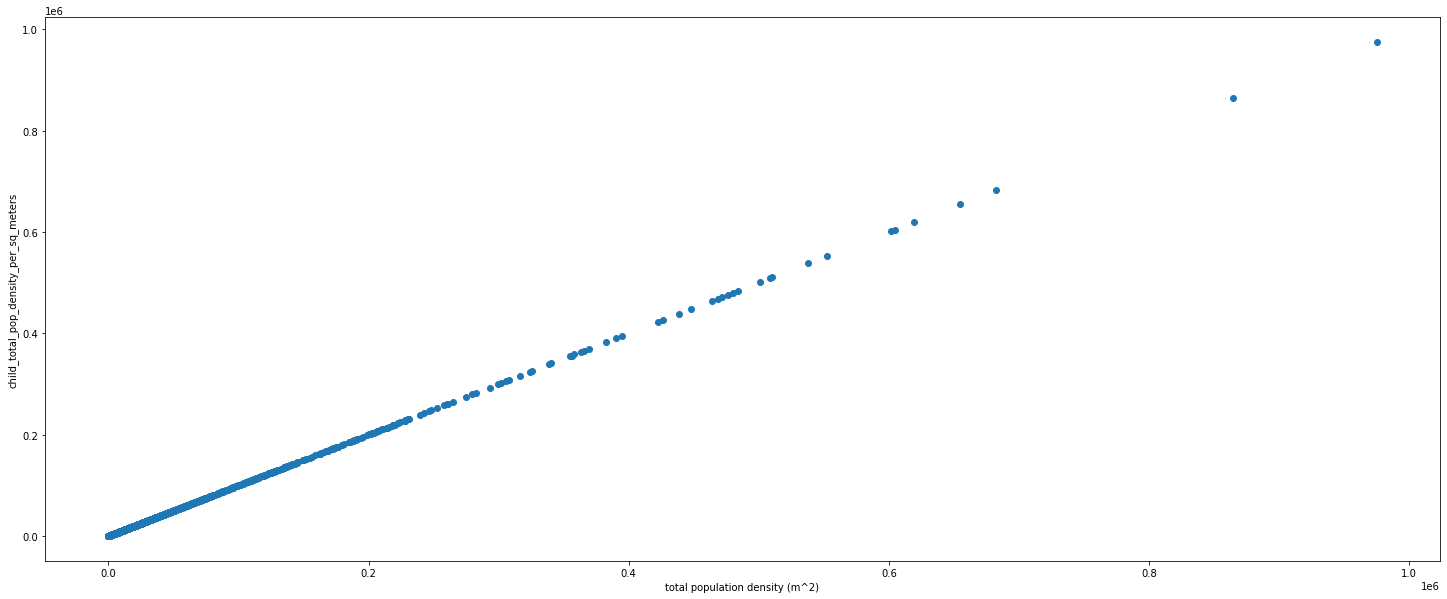

################
child_hisp_latino_density
nan


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


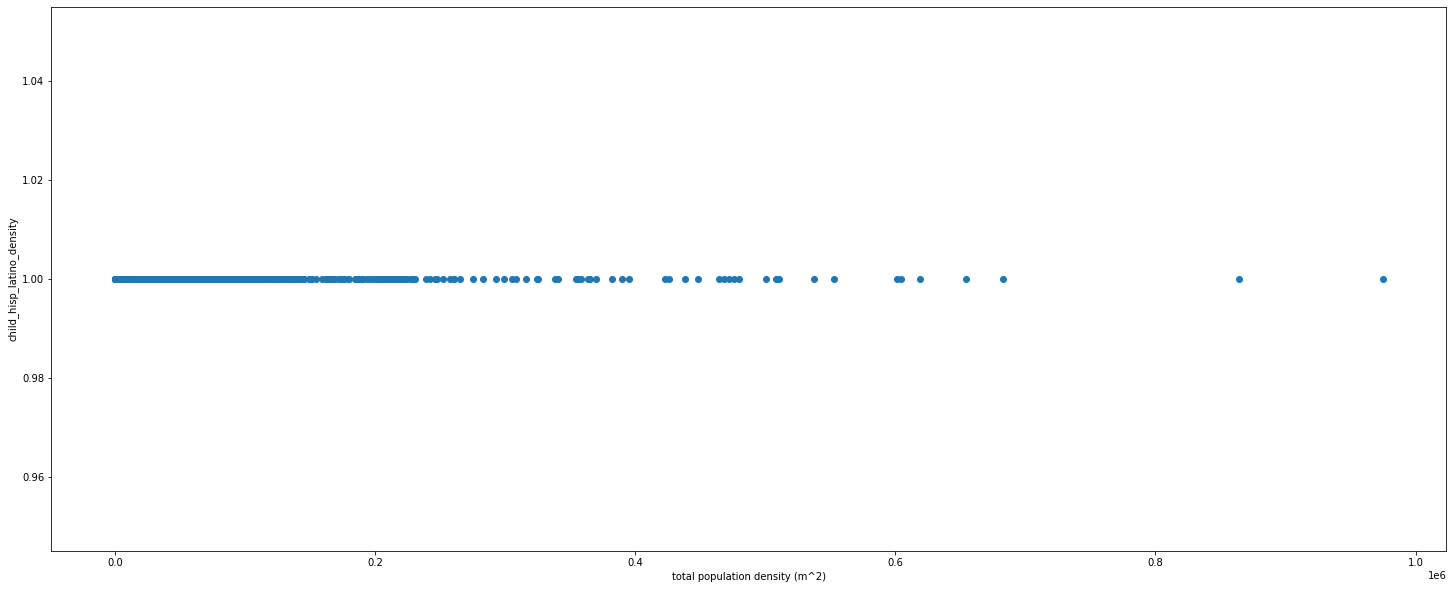

################
child_not_hisp_latino_density
-0.01313052188033687


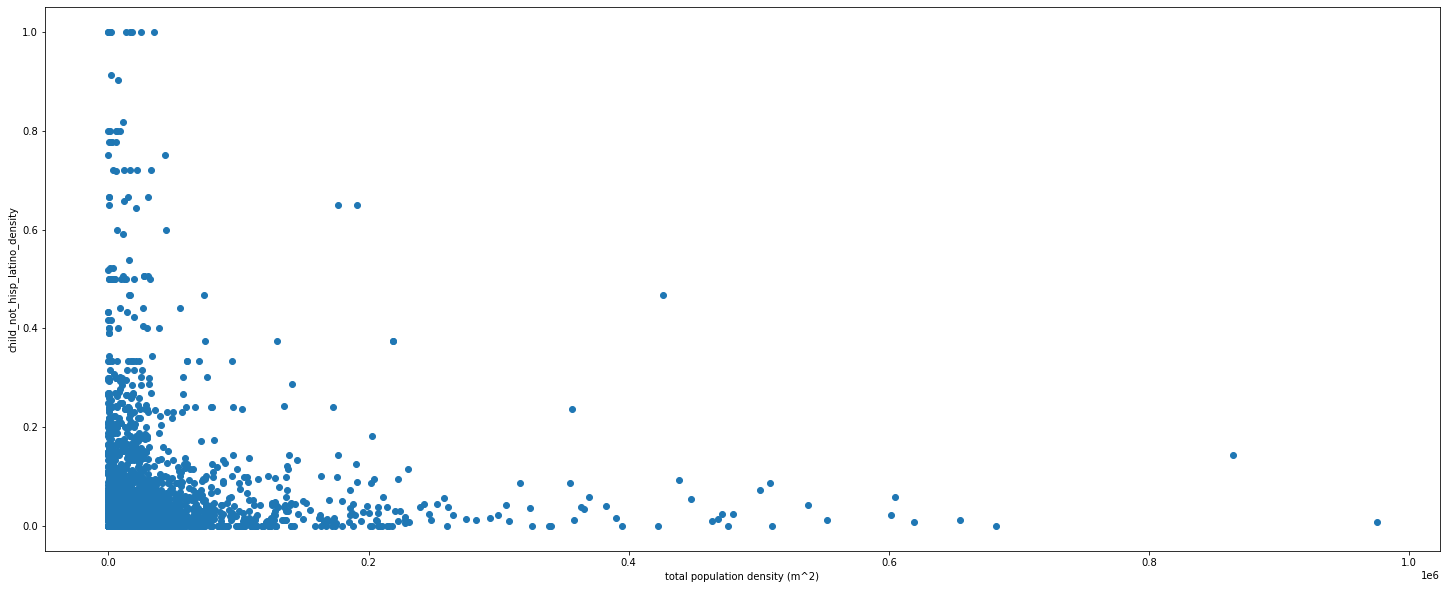

################
child_pop_one_race_density
0.01755050323001737


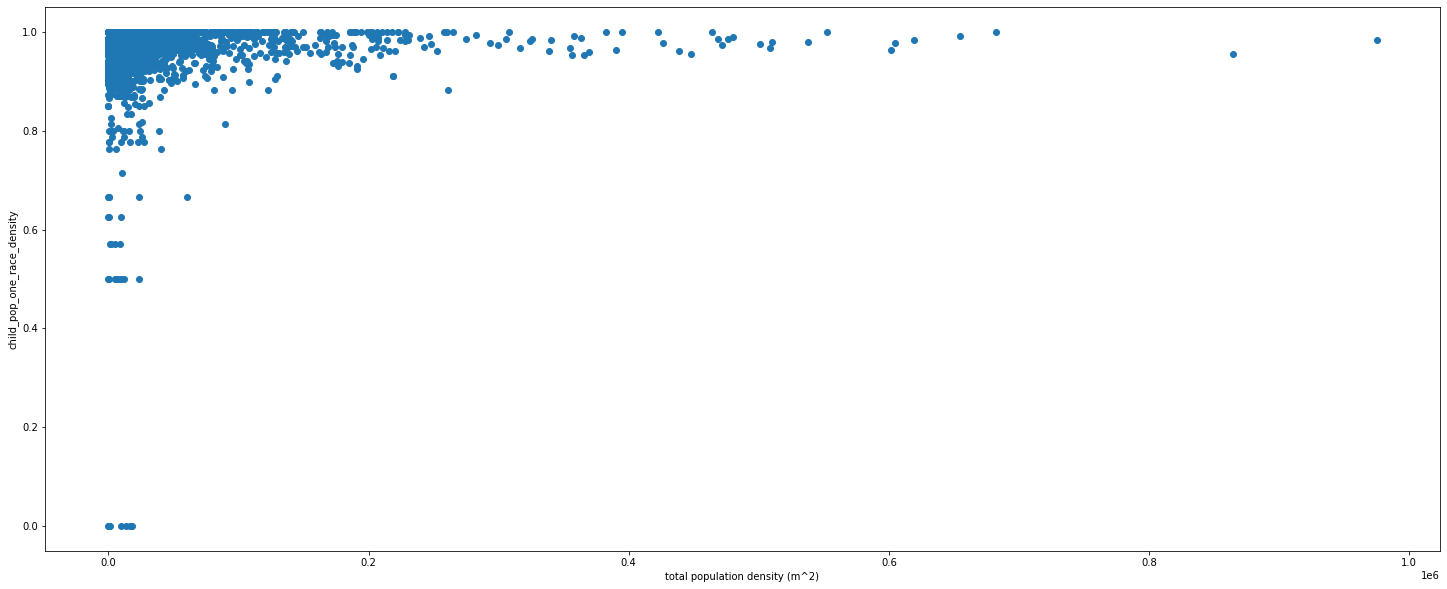

################
child_white_alone_density
0.053889300643098485


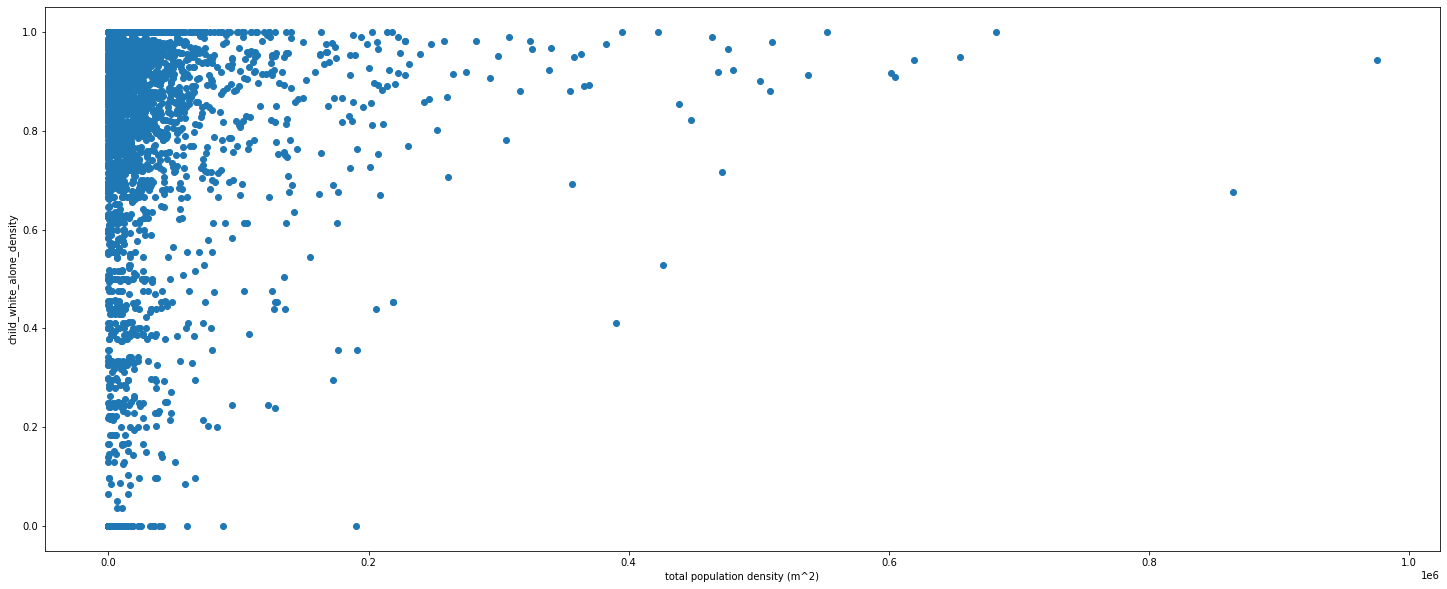

################
child_black_africamer_alone_density
-0.04464663752581977


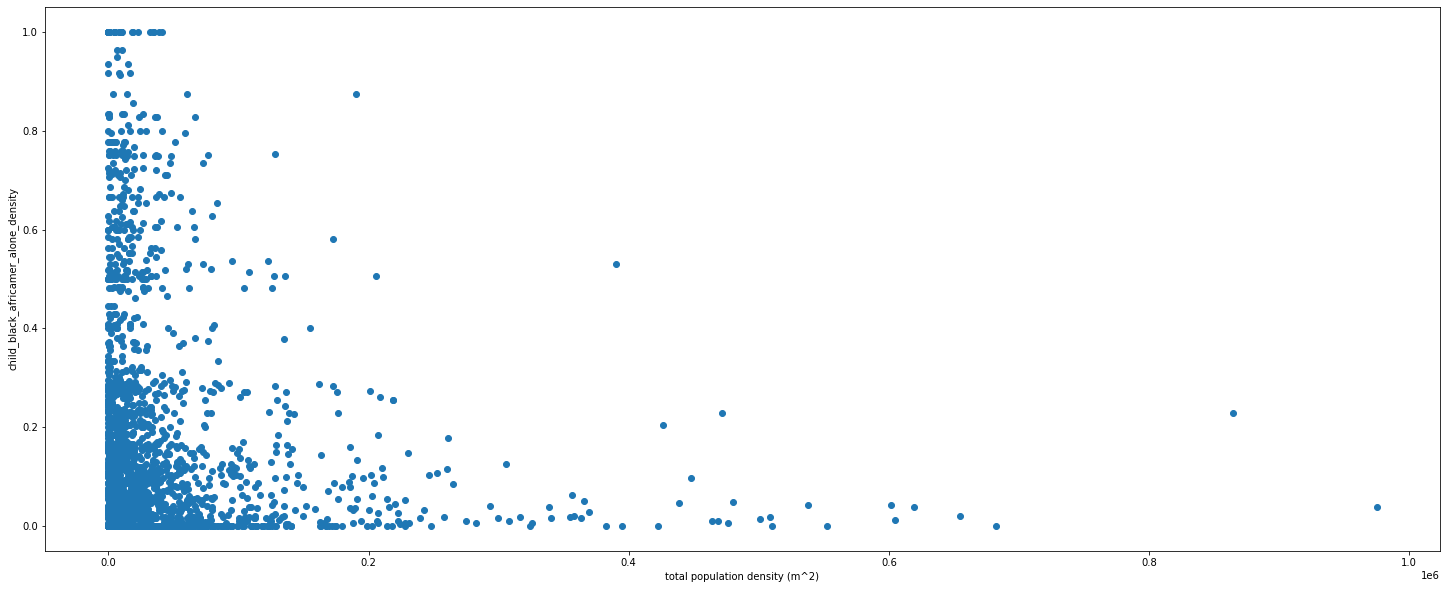

################
child_amerind_aknat_alone_density
-0.006865122811055901


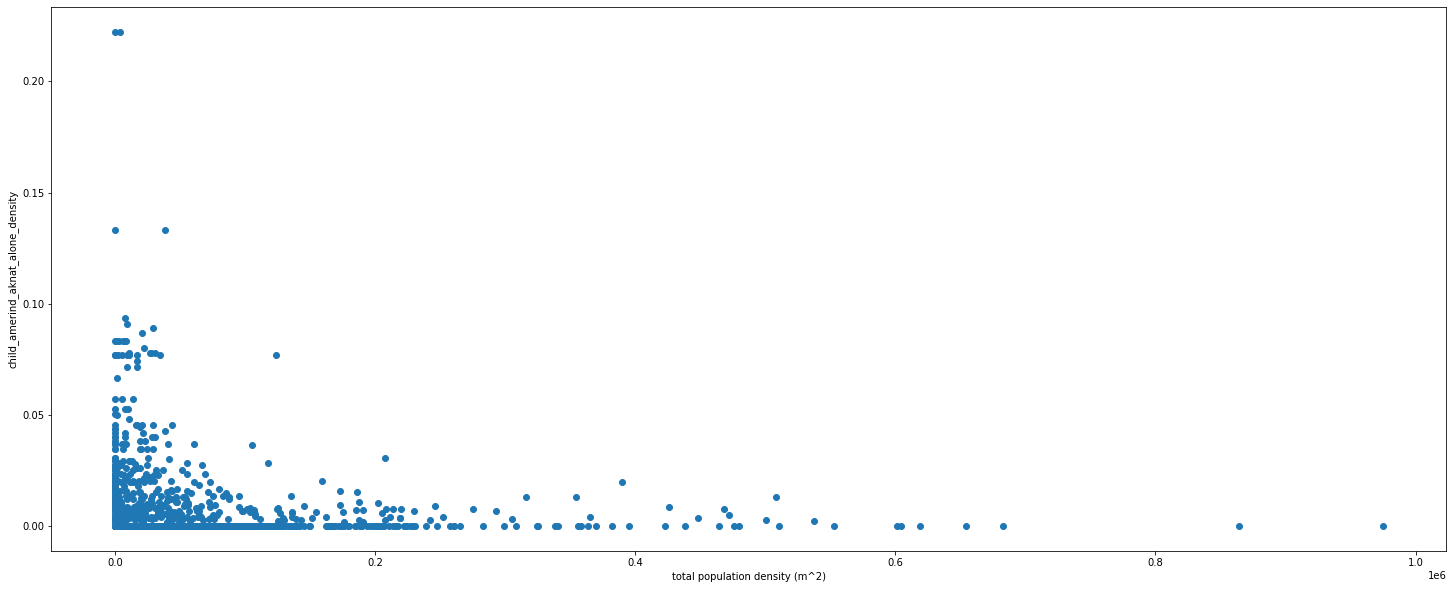

################
child_asian_alone_density
-0.015030636979101215


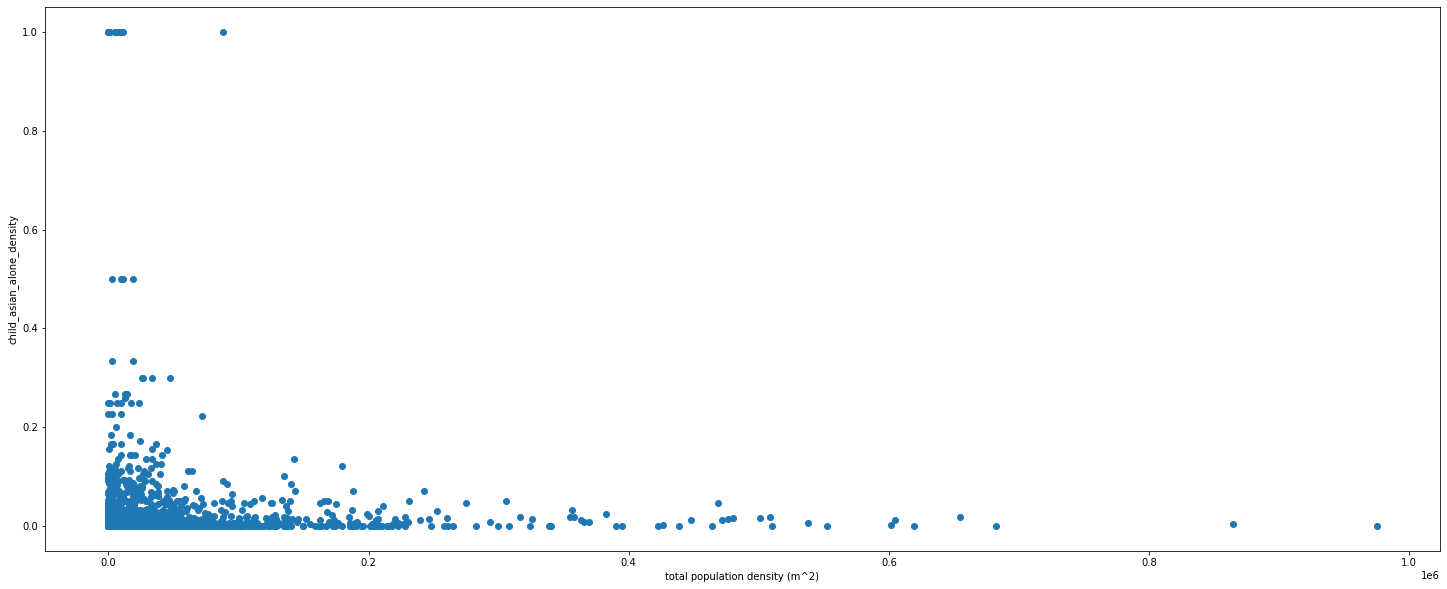

################
child_nathaw_pacisl_alone_density
-0.01174901023127581


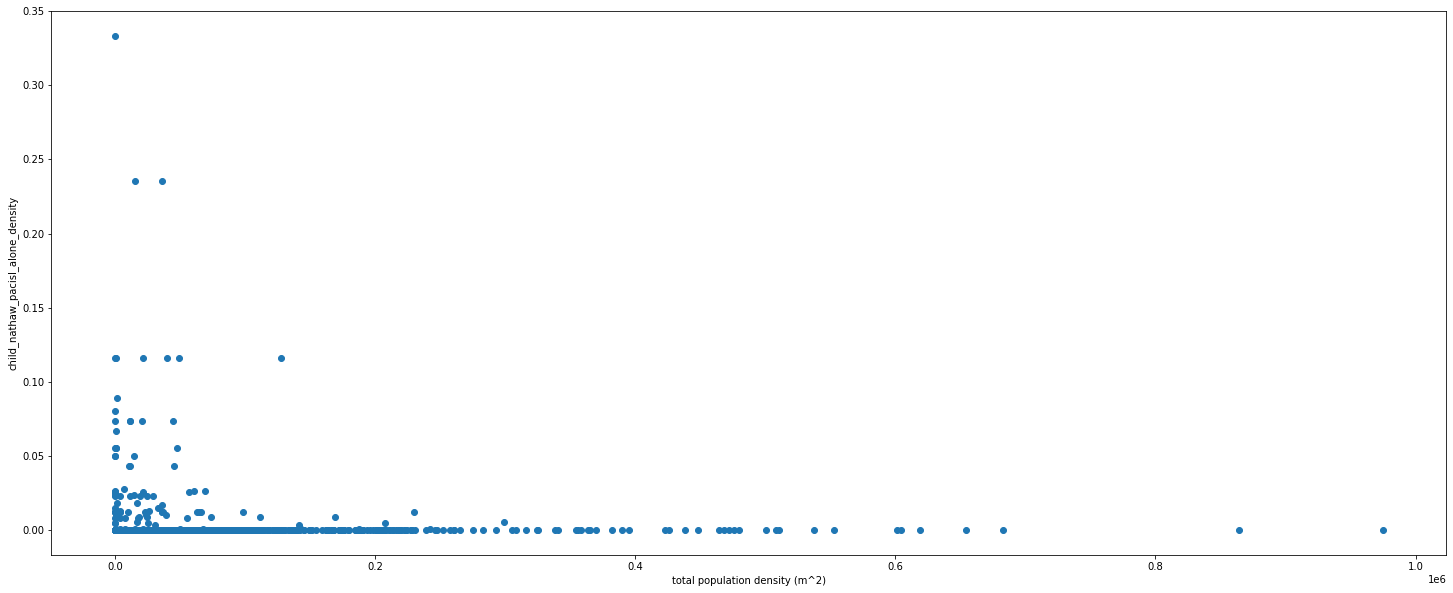

################
child_other_race_alone_density
-0.013159859591479929


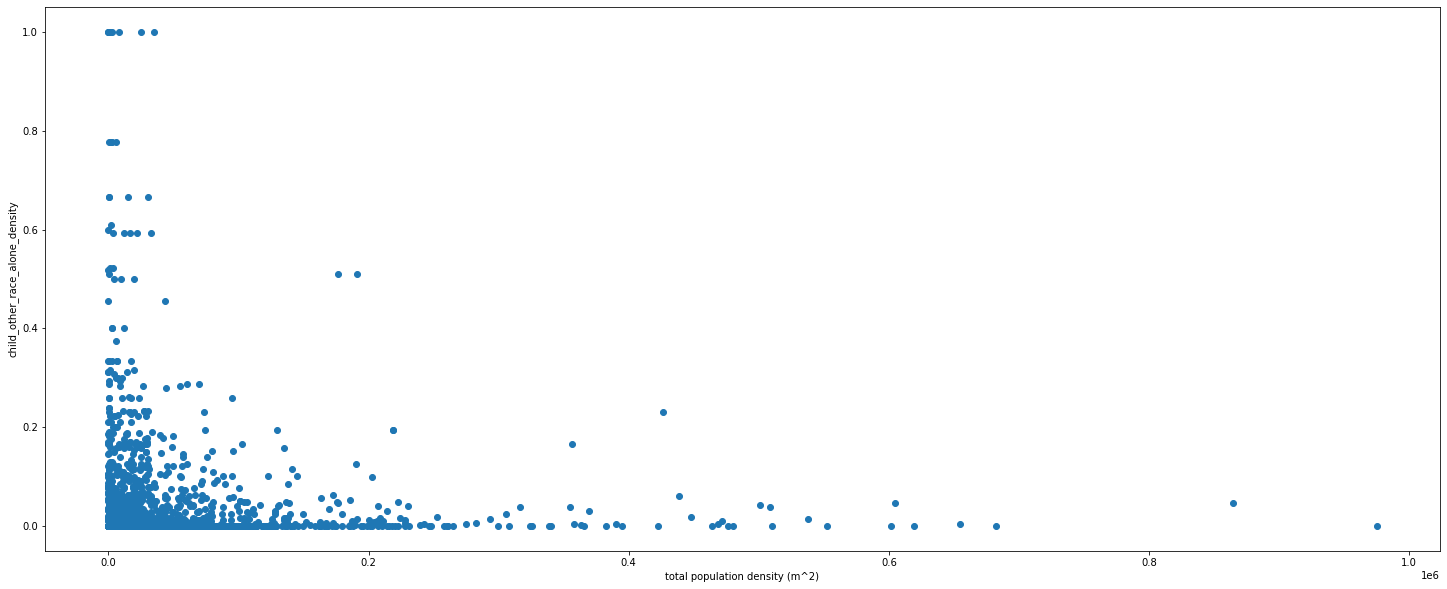

################
child_pop_two_or_more_races_density
-0.017550503230017382


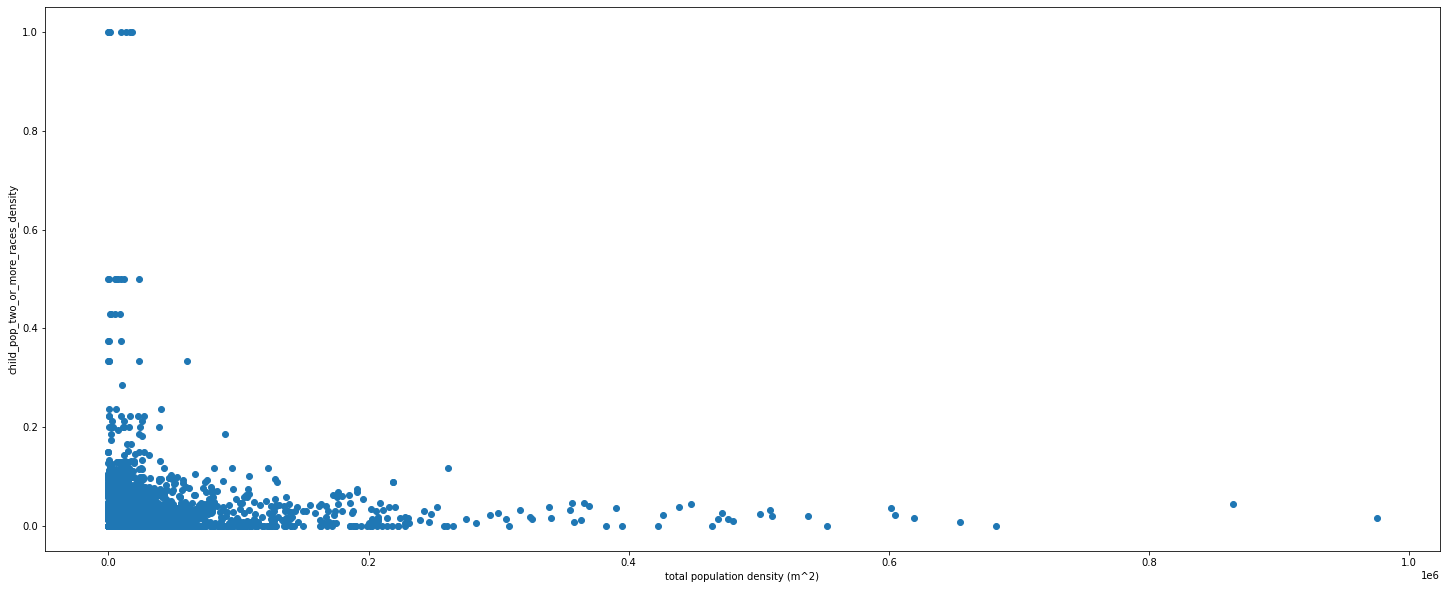

################
child_over18_total_pop_density
-0.037227967567159376


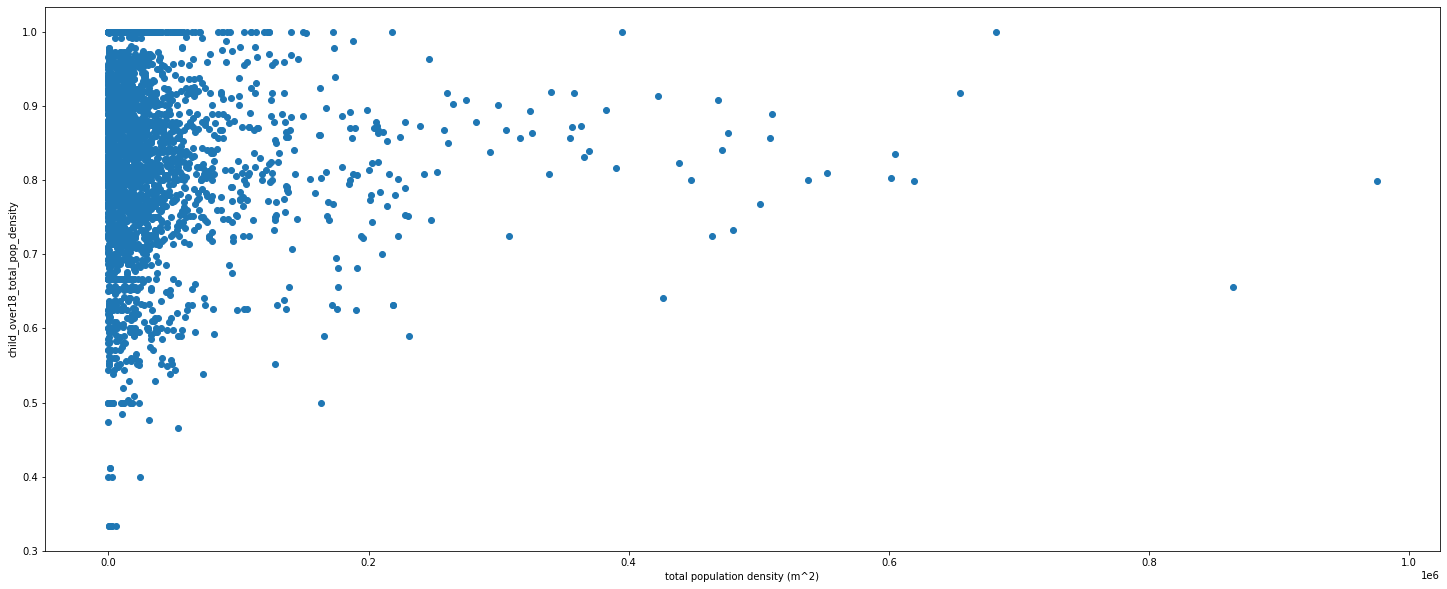

################
child_over18_hisp_latino_density
-0.02147168875724559


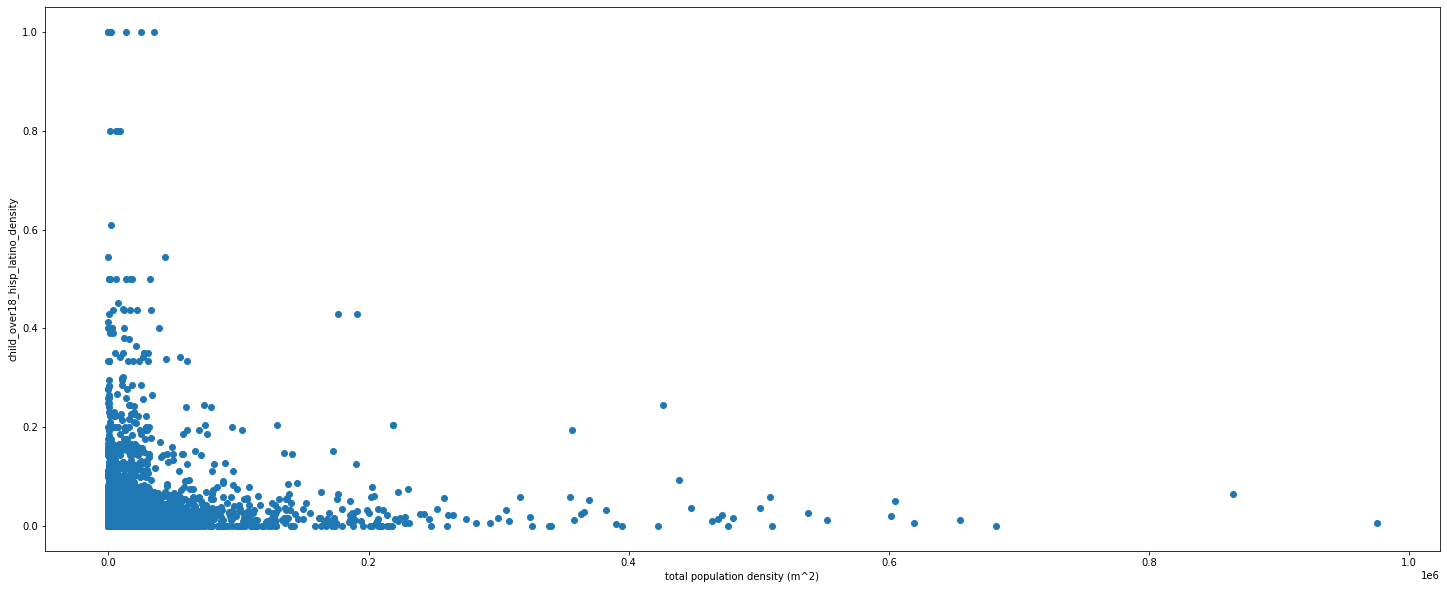

################
child_over18_not_hisp_latino_density
-0.015896802873275932


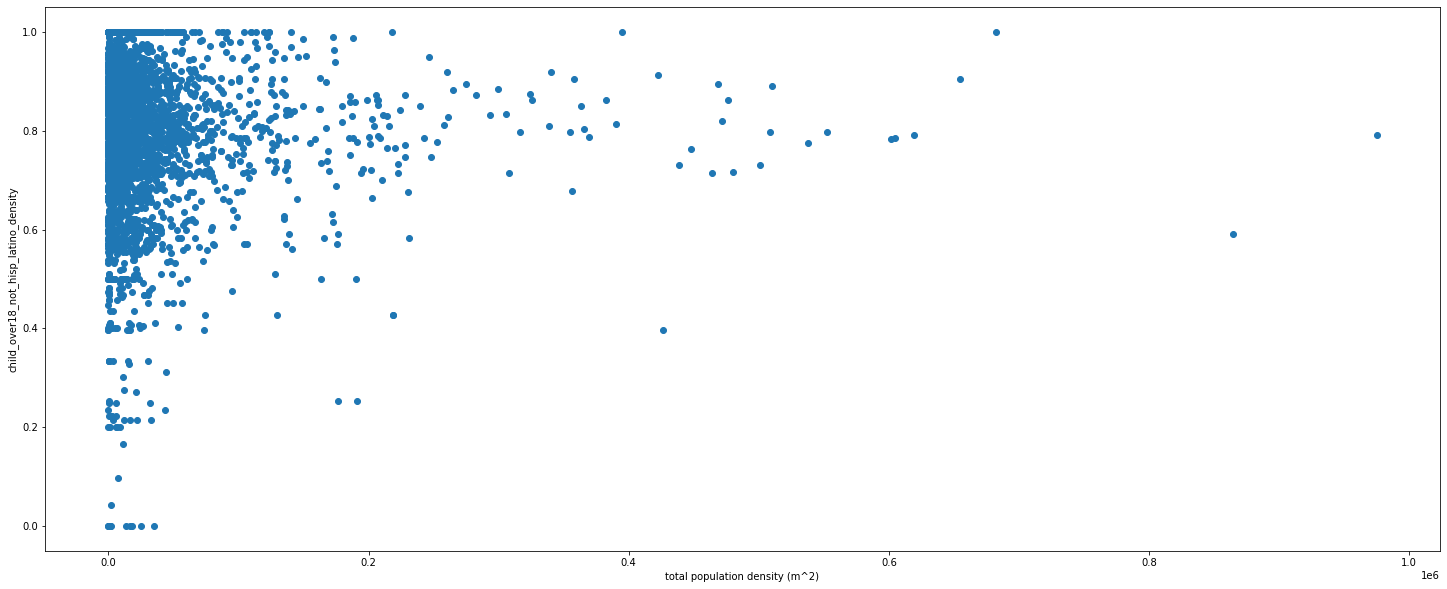

################
child_over18_pop_one_race_density
-0.02477400437498418


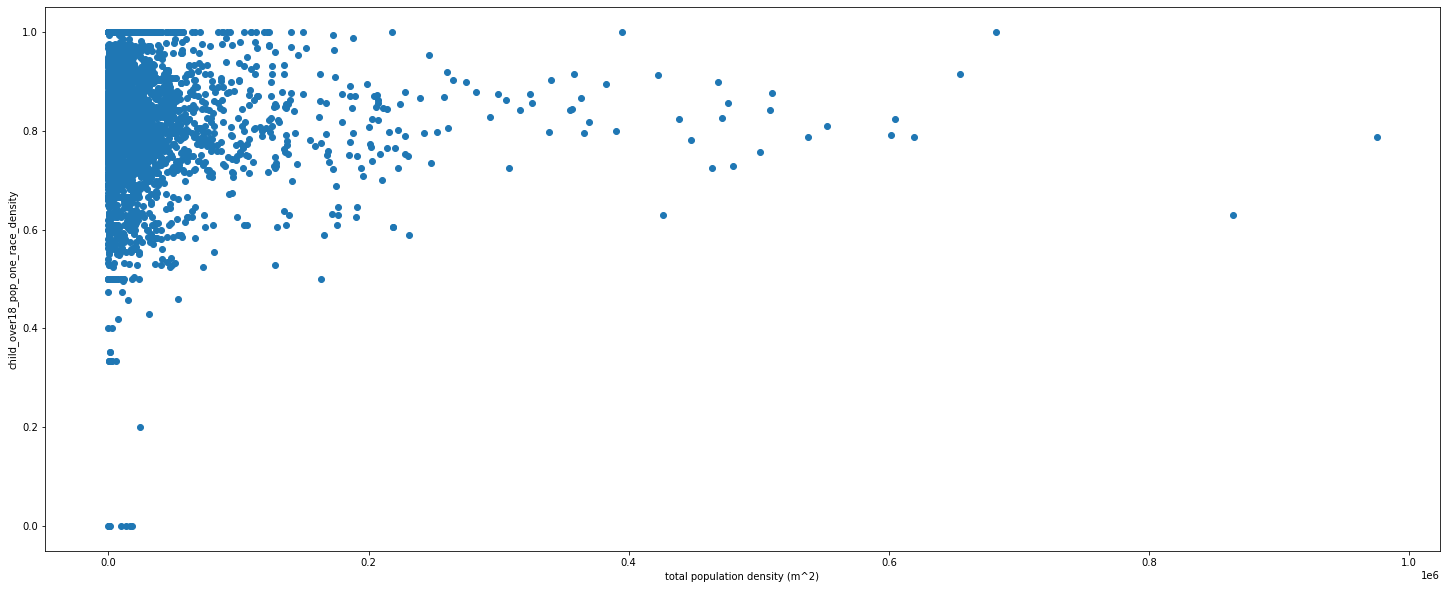

################
child_over18_white_alone_density
0.03495022017307877


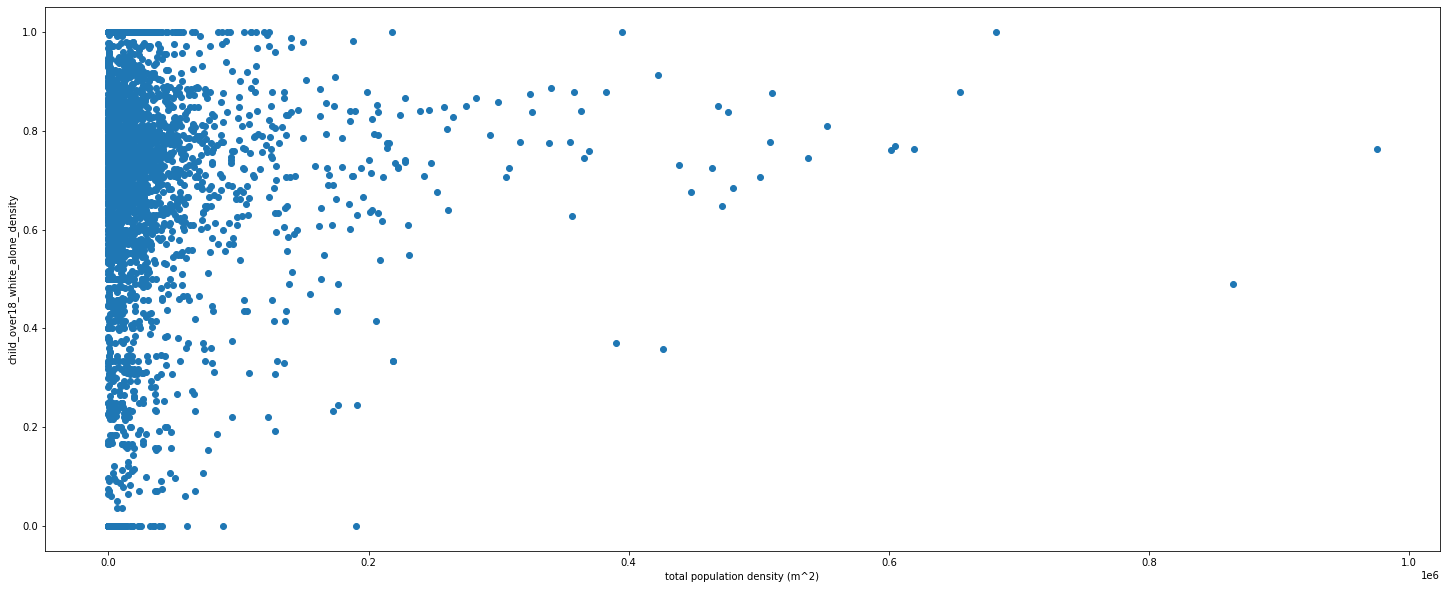

################
child_over18_black_africamer_alone_density
-0.0531259148643055


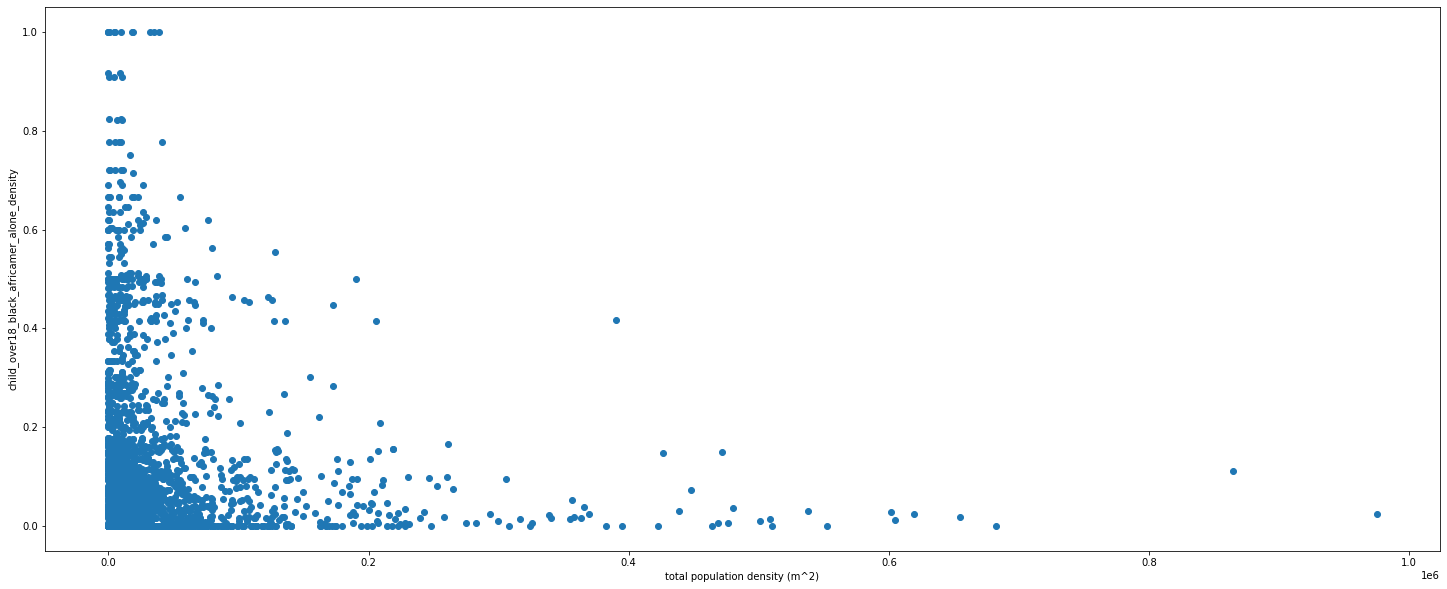

################
child_over18_amerind_aknat_alone_density
-0.009550786222333242


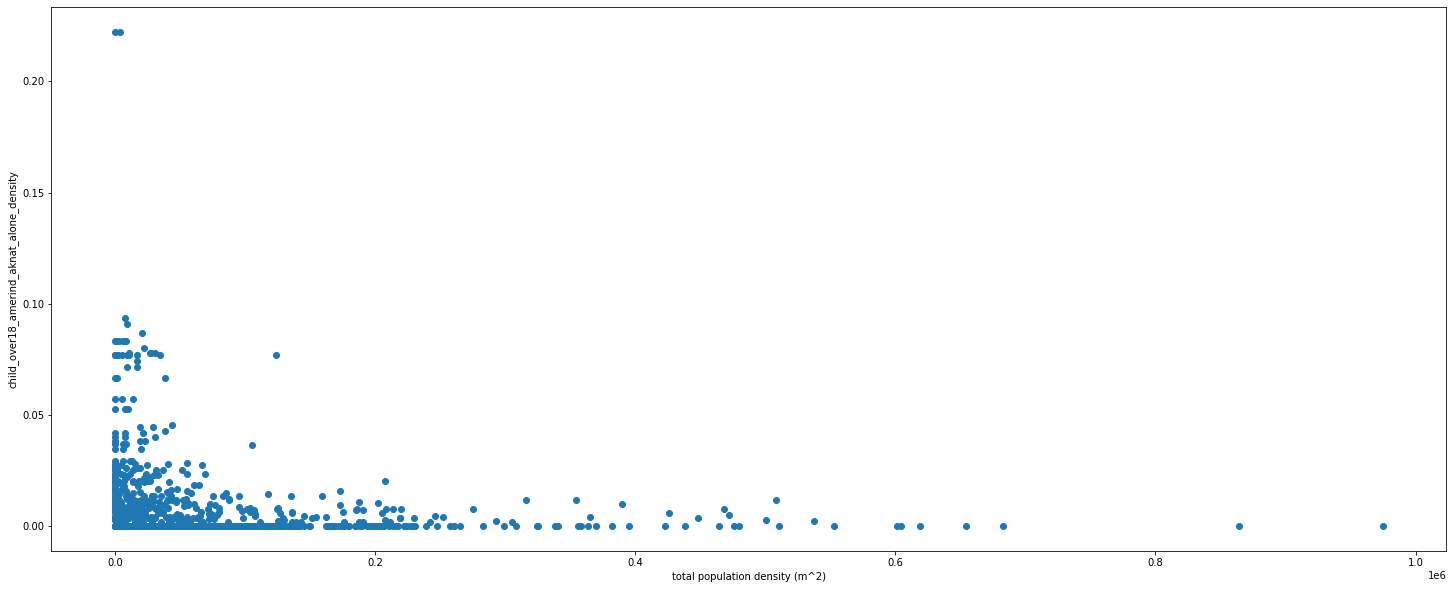

################
child_over18_asian_alone_density
-0.0176917172495409


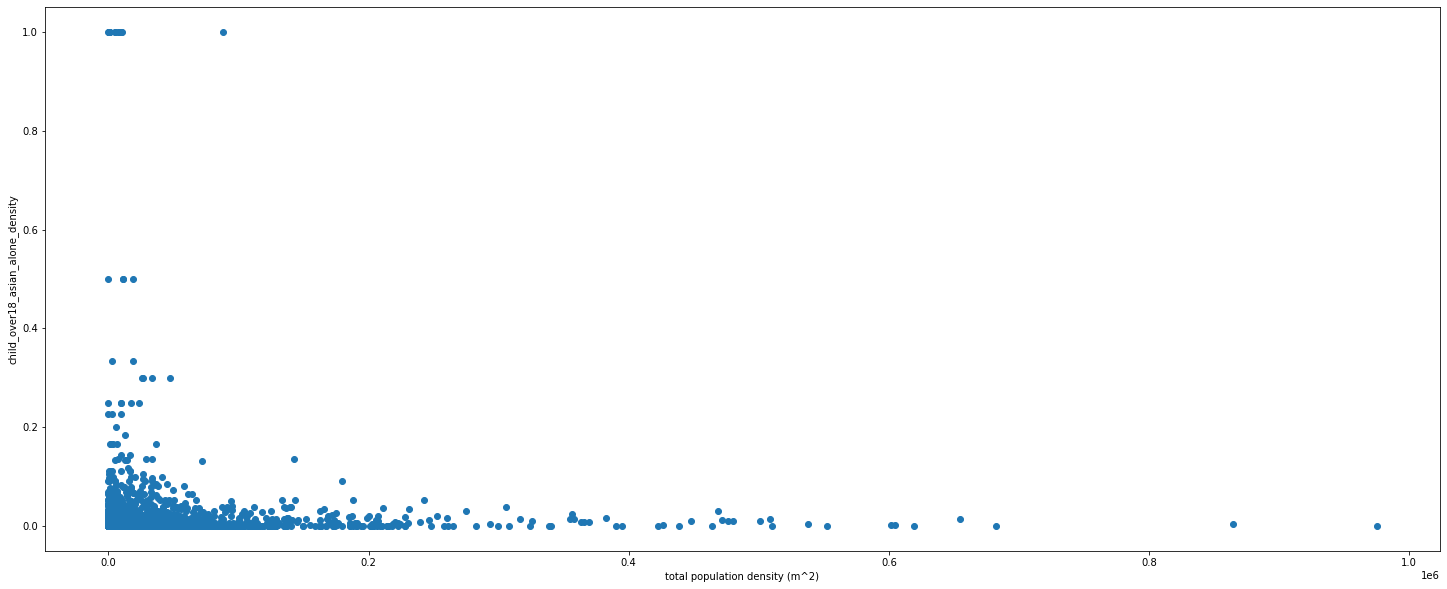

################
child_over18_nathaw_pacisl_alone_density
-0.014140571523490115


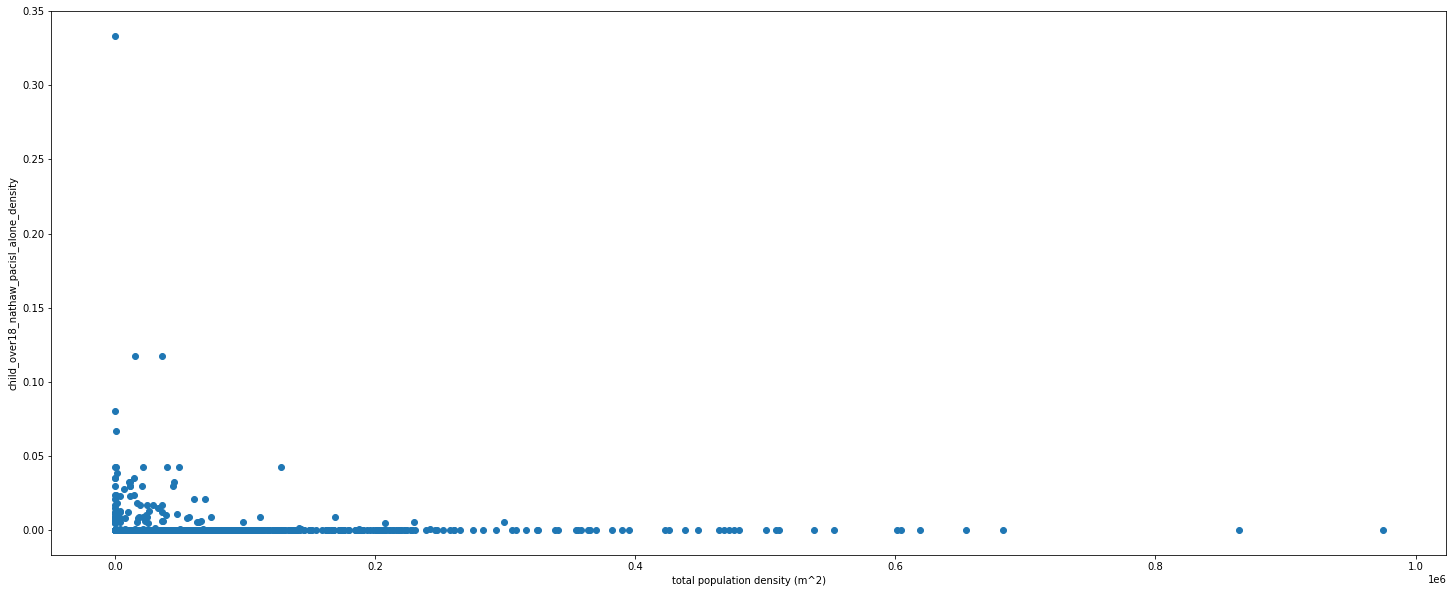

################
child_over18_other_race_alone_density
-0.014818742894050517


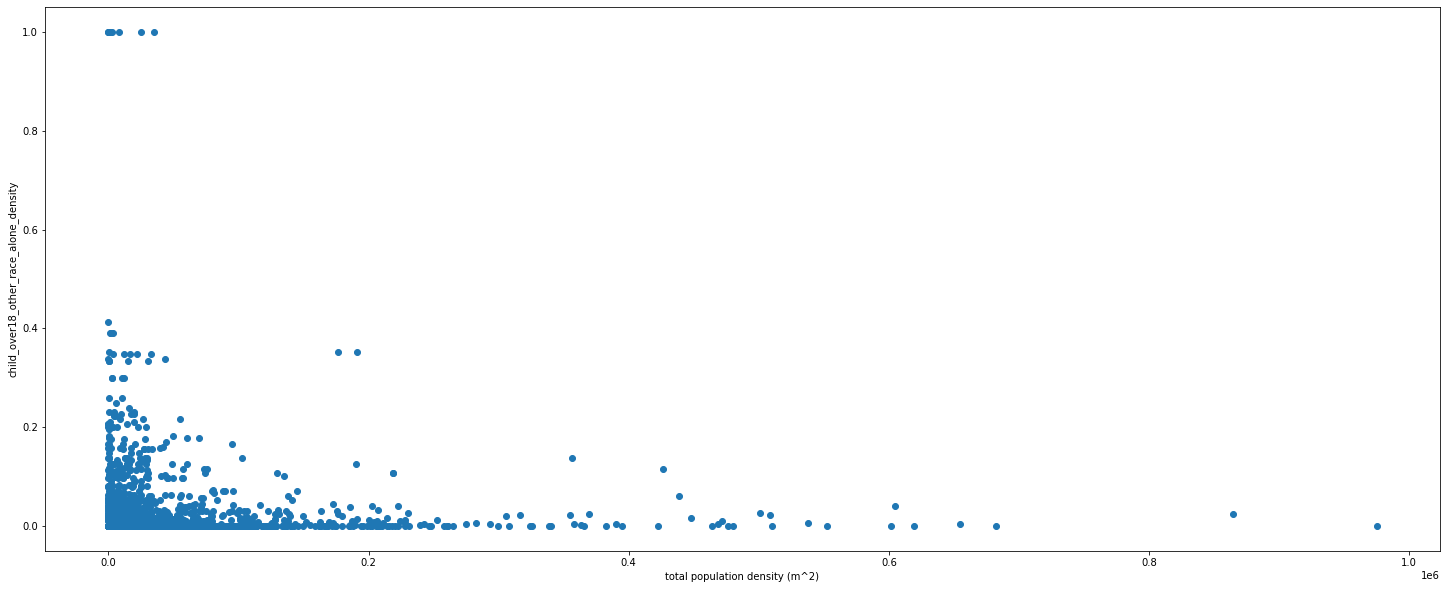

################
child_over18_pop_two_or_more_races_density
-0.022692079717147127


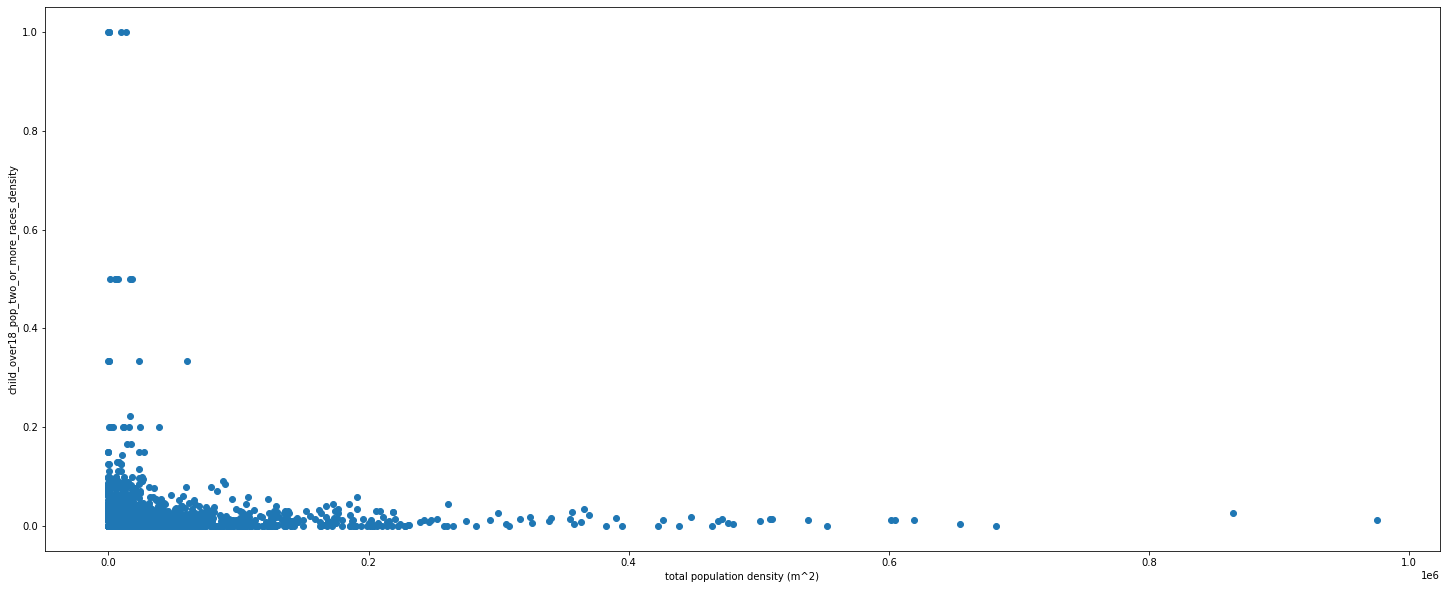

################
child_total_housing_units_density
-0.0539329627236099


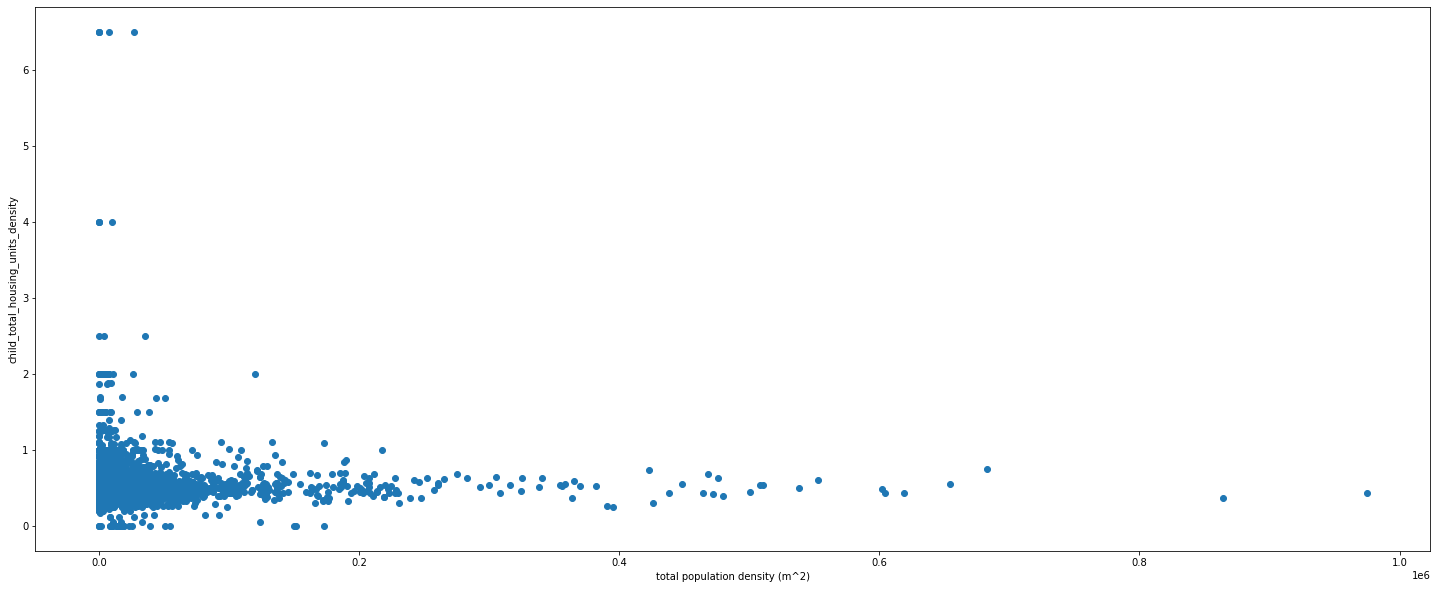

################
child_occupied_housing_units_density
-0.05871625021371972


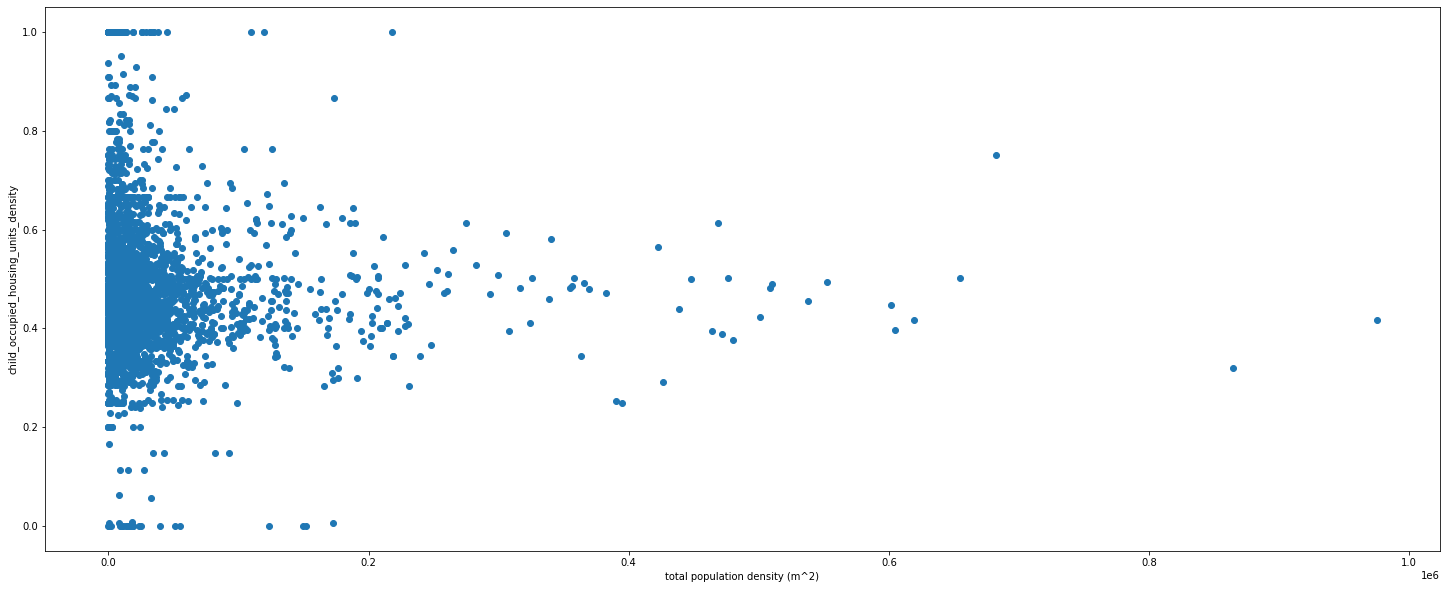

################
child_vacant_housing_units_density
-0.03570856122001102


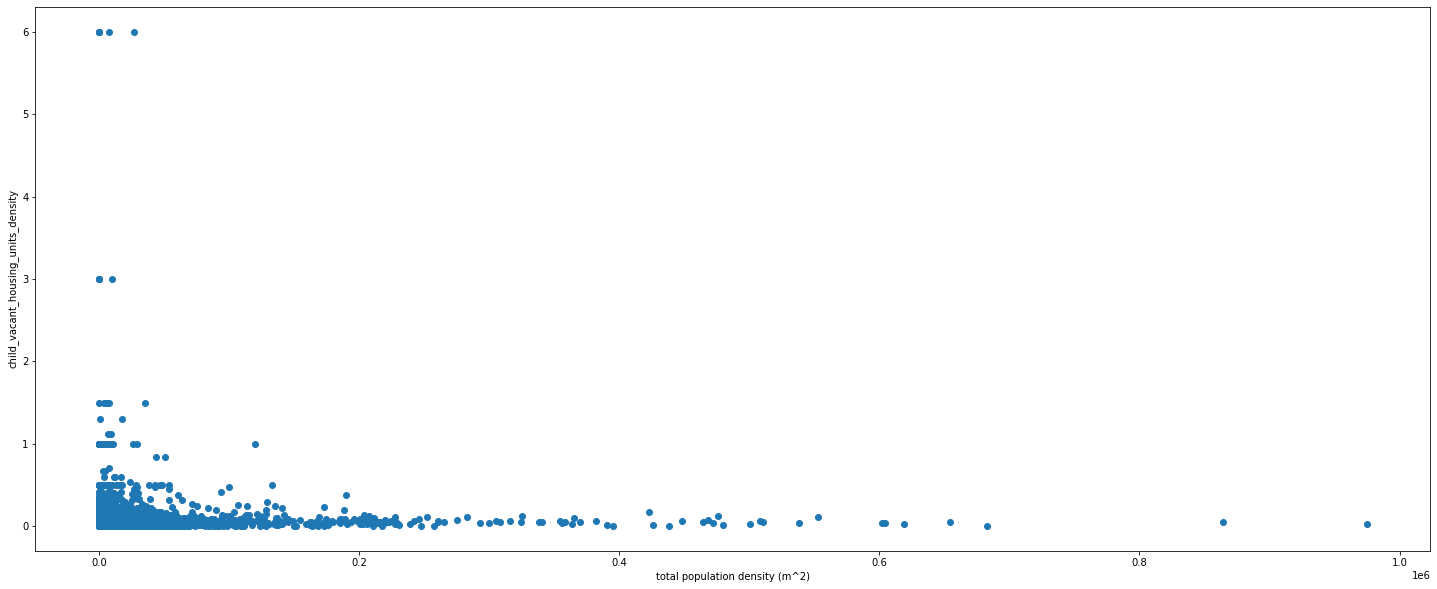

################


In [9]:
# iterable list of densities as yVals
yVals=['child_total_pop_density_per_sq_meters' ,      
        'child_hisp_latino_density',
        'child_not_hisp_latino_density',
        'child_pop_one_race_density',     
        'child_white_alone_density',
        'child_black_africamer_alone_density',
        'child_amerind_aknat_alone_density',
        'child_asian_alone_density',
        'child_nathaw_pacisl_alone_density',
        'child_other_race_alone_density',
        'child_pop_two_or_more_races_density',
        'child_over18_total_pop_density',
        'child_over18_hisp_latino_density',
        'child_over18_not_hisp_latino_density',
        'child_over18_pop_one_race_density',
        'child_over18_white_alone_density',
        'child_over18_black_africamer_alone_density',
        'child_over18_amerind_aknat_alone_density',
        'child_over18_asian_alone_density',
        'child_over18_nathaw_pacisl_alone_density',
        'child_over18_other_race_alone_density',
        'child_over18_pop_two_or_more_races_density',
        'child_total_housing_units_density',
        'child_occupied_housing_units_density',
        'child_vacant_housing_units_density',
      ]

rvals = {} #dictionary to store correlations

for yValue in yVals:
    x=[]
    y=[]
    try:
        for n,row in enumerate(children[yValue]):
            if math.isfinite(row):
                x.append(children['child_total_pop_density_per_sq_meters'][n])
                y.append(row)
        r,_ = scipy.stats.pearsonr(x,y)
        print(yValue)
        print(r)
        rvals[yValue]=r
    except Exception as e:
        print(e)
    plt.figure(figsize=(25,10))
    plt.scatter(x=children['child_total_pop_density_per_sq_meters'], y=children[yValue])
    plt.ylabel(yValue)
    plt.xlabel('total population density (m^2)')
    plt.show()
    print("################")


In [10]:
for k,v in rvals.items():
    print(f"{k}={v}")

child_total_pop_density_per_sq_meters=1.0
child_hisp_latino_density=nan
child_not_hisp_latino_density=-0.01313052188033687
child_pop_one_race_density=0.01755050323001737
child_white_alone_density=0.053889300643098485
child_black_africamer_alone_density=-0.04464663752581977
child_amerind_aknat_alone_density=-0.006865122811055901
child_asian_alone_density=-0.015030636979101215
child_nathaw_pacisl_alone_density=-0.01174901023127581
child_other_race_alone_density=-0.013159859591479929
child_pop_two_or_more_races_density=-0.017550503230017382
child_over18_total_pop_density=-0.037227967567159376
child_over18_hisp_latino_density=-0.02147168875724559
child_over18_not_hisp_latino_density=-0.015896802873275932
child_over18_pop_one_race_density=-0.02477400437498418
child_over18_white_alone_density=0.03495022017307877
child_over18_black_africamer_alone_density=-0.0531259148643055
child_over18_amerind_aknat_alone_density=-0.009550786222333242
child_over18_asian_alone_density=-0.0176917172495409
chi